In [4]:
import cv2
import numpy as np
import urllib.request as request
from PIL import Image,ImageDraw,ImageColor
import pHash

XML_PATH1 = "cvdata\\haarcascades\\haarcascade_frontalface_default.xml"


#This module can clasify the image based on faces.
#
#author MashiMaroLjc
#version 2016-2-26


def detect_faces(image):

    face_cascade1 = cv2.CascadeClassifier(XML_PATH1)
    if image.ndim == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image 

    faces = face_cascade1.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(10,10),
                                     flags=cv2.CASCADE_SCALE_IMAGE)


    result=[]
    
    for (x,y,width,height) in faces :
        result.append((x,y,x+width,y+height))
    return result


def PILMat_to_cvMat(image):
	'''
	Change the matrix from the format of PIL to openCV.
	'''
    mat =[]
    for l in image:
        x=[]
        for l2 in l:
            r,g,b = l2[0],l2[1],l2[2]
            x.append([b,g,r])
        mat.append(x)

    new_image = np.asarray(mat)
    return new_image



def split_imgae(image,xy):
	sub_image_list = []
	for (x1,y1,x2,y2) in  xy:
		sub_image = image.crop((x1,y1,x2,y2)).copy()
		sub_image_list.append(sub_image)

	return sub_image_list



def comp_faces(faces1,faces2,size,part_size):
	min_code = 1000 
	for face1 in faces1:
		for face2 in faces2:
			code = pHash.classify_DCT(face1, face2,size=size,part_size=part_size)
			if  code < min_code:
				min_code = code
	return min_code



def classify_faces(image1,image2,size=(32,32),part_size = (8,8)):
	"""
	image1' and 'image2' is a Image Object.
	You can build it by 'Image.open(path)'.
	'Size' is parameter what the image will resize to it and then image will be compared by the pHash.
	It's 32 * 32 when it default.  
	'part_size' is a size of a part of the matrix after Discrete Cosine Transform,which need to next steps.
	It's 8 * 8 when it default. 
	The function will return the hamming code,less is correct. 
	"""
	img= np.asarray(image1)
	img = PILMat_to_cvMat(img)
	faces = detect_faces(img) 
	if faces:
		every_face1 = split_imgae(image1, faces)
	else:
		return 1000  #False

	img= np.asarray(image2)
	img = PILMat_to_cvMat(img)
	faces = detect_faces(img) 
	if faces:
		every_face2 = split_imgae(image2, faces)
	else:
		return 1000	 #False

	return comp_faces(every_face1, every_face2,size,part_size)

__all__=[classify_faces]

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 39)

In [6]:

# -*- coding:utf-8 -*-

from functools import reduce
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# 计算图片的局部哈希值--pHash
# def phash(img):
#     """
#     :param img: 图片
#     :return: 返回图片的局部hash值
#     """
#     img = img.resize((8, 8), Image.ANTIALIAS).convert('L')
#     avg = reduce(lambda x, y: x + y, img.getdata()) / 64.
#     hash_value=reduce(lambda x, y: x | (y[1] << y[0]), enumerate(map(lambda i: 0 if i < avg else 1, img.getdata())), 0)
#     print(hash_value)
#     return hash_value
#均值哈希算法
def aHash(img):
    img=cv2.resize(img,(8,8))
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    np_mean = np.mean(gray)                           # 求numpy.ndarray平均值
    ahash_01 = (gray>np_mean)+0                       # 大于平均值=1，否则=0
    ahash_list = ahash_01.reshape(1,-1)[0].tolist()   # 展平->转成列表
    ahash_str = ''.join([str(x) for x in ahash_list])
    return ahash_st

# 计算汉明距离:
def hamming_distance(a, b):
    """
    :param a: 图片1的hash值
    :param b: 图片2的hash值
    :return: 返回两个图片hash值的汉明距离
    """
    hm_distance=bin(a ^ b).count('1')
    print(hm_distance)
    return hm_distance


# 计算两个图片是否相似:
def is_imgs_similar(img1,img2):
    """
    :param img1: 图片1
    :param img2: 图片2
    :return:  True 图片相似  False 图片不相似
    """
    return True if hamming_distance(aHash(img1),aHash(img2)) <= 13 else False




if __name__ == '__main__':
    
    


    # 读取图片
    sensitive_pic = Image.open("/home/ubuntu/data_process/CT_Result/C/C_11.png")
    target_pic = Image.open("/home/ubuntu/data_process/CT_Result/C/C_37.png")

    # 比较图片相似度
    result=is_imgs_similar(target_pic, sensitive_pic)

    print(result)
# plt.subplot(121),plt.imshow(sensitive_pic,cmap = 'gray')
# plt.title('11'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(target_pic,cmap = 'gray')
# plt.title('B'), plt.xticks([]), plt.yticks([])


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [28]:
import cv2
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
 
 
def aHash(img):
    # 均值哈希算法
    # 缩放为8*8
    img = cv2.resize(img, (8, 8))
    # 转换为灰度图
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # s为像素和初值为0，hash_str为hash值初值为''
    s = 0
    hash_str = ''
    # 遍历累加求像素和
    for i in range(8):
        for j in range(8):
            s = s+gray[i, j]
    # 求平均灰度
    avg = s/64
    # 灰度大于平均值为1相反为0生成图片的hash值
    for i in range(8):
        for j in range(8):
            if gray[i, j] > avg:
                hash_str = hash_str+'1'
            else:
                hash_str = hash_str+'0'
    return hash_str
 
 
def dHash(img):
    # 差值哈希算法
    # 缩放8*8
    img = cv2.resize(img, (9, 8))
    # 转换灰度图
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hash_str = ''
    # 每行前一个像素大于后一个像素为1，相反为0，生成哈希
    for i in range(8):
        for j in range(8):
            if gray[i, j] > gray[i, j+1]:
                hash_str = hash_str+'1'
            else:
                hash_str = hash_str+'0'
    return hash_str
 
 
def pHash(img):
    # 感知哈希算法
    # 缩放32*32
    img = cv2.resize(img, (32, 32))   # , interpolation=cv2.INTER_CUBIC
 
    # 转换为灰度图
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 将灰度图转为浮点型，再进行dct变换
    dct = cv2.dct(np.float32(gray))
    # opencv实现的掩码操作
    dct_roi = dct[0:8, 0:8]
 
    hash = []
    avreage = np.mean(dct_roi)
    for i in range(dct_roi.shape[0]):
        for j in range(dct_roi.shape[1]):
            if dct_roi[i, j] > avreage:
                hash.append(1)
            else:
                hash.append(0)
    return hash
 
 
def calculate(image1, image2):
    # 灰度直方图算法
    # 计算单通道的直方图的相似值
    hist1 = cv2.calcHist([image1], [0], None, [256], [0.0, 255.0])
    hist2 = cv2.calcHist([image2], [0], None, [256], [0.0, 255.0])
    # 计算直方图的重合度
    degree = 0
    for i in range(len(hist1)):
        if hist1[i] != hist2[i]:
            degree = degree + \
                (1 - abs(hist1[i] - hist2[i]) / max(hist1[i], hist2[i]))
        else:
            degree = degree + 1
    degree = degree / len(hist1)
    return degree
 
 
def classify_hist_with_split(image1, image2, size=(256, 256)):
    # RGB每个通道的直方图相似度
    # 将图像resize后，分离为RGB三个通道，再计算每个通道的相似值
    image1 = cv2.resize(image1, size)
    image2 = cv2.resize(image2, size)
    sub_image1 = cv2.split(image1)
    sub_image2 = cv2.split(image2)
    sub_data = 0
    for im1, im2 in zip(sub_image1, sub_image2):
        sub_data += calculate(im1, im2)
    sub_data = sub_data / 3
    return sub_data
 
 
def cmpHash(hash1, hash2):
    # Hash值对比
    # 算法中1和0顺序组合起来的即是图片的指纹hash。顺序不固定，但是比较的时候必须是相同的顺序。
    # 对比两幅图的指纹，计算汉明距离，即两个64位的hash值有多少是不一样的，不同的位数越小，图片越相似
    # 汉明距离：一组二进制数据变成另一组数据所需要的步骤，可以衡量两图的差异，汉明距离越小，则相似度越高。汉明距离为0，即两张图片完全一样
    n = 0
    # hash长度不同则返回-1代表传参出错
    if len(hash1) != len(hash2):
        return -1
    # 遍历判断
    for i in range(len(hash1)):
        # 不相等则n计数+1，n最终为相似度
        if hash1[i] != hash2[i]:
            n = n + 1
    return n
 
 
def getImageByUrl(url):
    # 根据图片url 获取图片对象
    html = requests.get(url, verify=False)
    image = Image.open(BytesIO(html.content))
    return image
 
 
def PILImageToCV():
    # PIL Image转换成OpenCV格式
    path = "/Users/waldenz/Documents/Work/doc/TestImages/t3.png"
    img = Image.open(path)
    plt.subplot(121)
    plt.imshow(img)
    print(isinstance(img, np.ndarray))
    img = cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR)
    print(isinstance(img, np.ndarray))
    plt.subplot(122)
    plt.imshow(img)
    plt.show()
 
 
def CVImageToPIL():
    # OpenCV图片转换为PIL image
    path = "/Users/waldenz/Documents/Work/doc/TestImages/t3.png"
    img = cv2.imread(path)
    # cv2.imshow("OpenCV",img)
    plt.subplot(121)
    plt.imshow(img)
 
    img2 = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.subplot(122)
    plt.imshow(img2)
    plt.show()
 
def bytes_to_cvimage(filebytes):
    # 图片字节流转换为cv image
    image = Image.open(filebytes)
    img = cv2.cvtColor(np.asarray(image), cv2.COLOR_RGB2BGR)
    return img
 
def runAllImageSimilaryFun(para1, para2):
    # 均值、差值、感知哈希算法三种算法值越小，则越相似,相同图片值为0
    # 三直方图算法和单通道的直方图 0-1之间，值越大，越相似。 相同图片为1
 
    # t1,t2   14;19;10;  0.70;0.75
    # t1,t3   39 33 18   0.58 0.49
    # s1,s2  7 23 11     0.83 0.86  挺相似的图片
    # c1,c2  11 29 17    0.30 0.31
 
    if para1.startswith("http"):
         # 根据链接下载图片，并转换为opencv格式
        img1 = getImageByUrl(para1)
        img1 = cv2.cvtColor(np.asarray(img1), cv2.COLOR_RGB2BGR)
 
        img2 = getImageByUrl(para2)
        img2 = cv2.cvtColor(np.asarray(img2), cv2.COLOR_RGB2BGR)
    else:
        # 通过imread方法直接读取物理路径
        img1 = cv2.imread(para1)
        img2 = cv2.imread(para2)
 
    hash1 = aHash(img1)
    hash2 = aHash(img2)
    n1 = cmpHash(hash1, hash2)
    print('均值哈希算法相似度aHash：', n1)
 
    hash1 = dHash(img1)
    hash2 = dHash(img2)
    n2 = cmpHash(hash1, hash2)
    print('差值哈希算法相似度dHash：', n2)
 
    hash1 = pHash(img1)
    hash2 = pHash(img2)
    n3 = cmpHash(hash1, hash2)
    print('感知哈希算法相似度pHash：', n3)
 
    n4 = classify_hist_with_split(img1, img2)
    print('三直方图算法相似度：', n4)
 
    n5 = calculate(img1, img2)
    print("单通道的直方图", n5)
    print("%d %d %d %.2f %.2f " % (n1, n2, n3, round(n4[0], 2), n5[0]))
    print("%.2f %.2f %.2f %.2f %.2f " % (1-float(n1/64), 1 -
                                         float(n2/64), 1-float(n3/64), round(n4[0], 2), n5[0]))
 
    plt.subplot(121)
    plt.imshow(Image.fromarray(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)))
    plt.subplot(122)
    plt.imshow(Image.fromarray(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)))
    plt.show()
 
if __name__ == "__main__":
    p1="https://ww3.sinaimg.cn/bmiddle/007INInDly1g336j2zziwj30su0g848w.jpg"
    p2="https://ww2.sinaimg.cn/bmiddle/007INInDly1g336j10d32j30vd0hnam6.jpg"
    runAllImageSimilaryFun(p1,p2)

ModuleNotFoundError: No module named 'requests'

In [2]:
import cv2
import time
import numpy as np


#均值哈希算法
def aHash(img):
    img=cv2.resize(img,(8,8))
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    np_mean = np.mean(gray)                           # 求numpy.ndarray平均值
    ahash_01 = (gray>np_mean)+0                       # 大于平均值=1，否则=0
    ahash_list = ahash_01.reshape(1,-1)[0].tolist()   # 展平->转成列表
    ahash_str = ''.join([str(x) for x in ahash_list])
    return ahash_str


def pHash(img):
    img = cv2.resize(img, (32, 32))    # 默认interpolation=cv2.INTER_CUBIC
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    dct = cv2.dct(np.float32(gray))
    dct_roi = dct[0:8, 0:8]            # opencv实现的掩码操作

    avreage = np.mean(dct_roi)
    phash_01 = (dct_roi>avreage)+0
    phash_list = phash_01.reshape(1,-1)[0].tolist()
    phash_str = ''.join([str(x) for x in phash_list])
    return phash_str

def dHash(img):
    img=cv2.resize(img,(9,8))
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    #每行前一个像素大于后一个像素为1，相反为0，生成哈希
    hash_str0 = []
    for i in range(8):
        hash_str0.append(gray[:, i] > gray[:, i + 1])
    hash_str1 = np.array(hash_str0)+0
    hash_str2 = hash_str1.T
    hash_str3 = hash_str2.reshape(1,-1)[0].tolist()
    dhash_str = ''.join([str(x) for x in hash_str3])
    return dhash_str


def hammingDist(s1, s2):
    assert len(s1) == len(s2)
    return sum([ch1 != ch2 for ch1, ch2 in zip(s1, s2)])

# 通过得到RGB每个通道的直方图来计算相似度
def classify_hist_with_split(image1, image2, size=(256, 256)):
    # 将图像resize后，分离为RGB三个通道，再计算每个通道的相似值
    image1 = cv2.resize(image1, size)
    image2 = cv2.resize(image2, size)
    sub_image1 = cv2.split(image1)
    sub_image2 = cv2.split(image2)
    sub_data = 0
    for im1, im2 in zip(sub_image1, sub_image2):
        sub_data += calculate(im1, im2)
    sub_data = sub_data / 3
    return sub_data


# 计算单通道的直方图的相似值
def calculate(image1, image2):
    hist1 = cv2.calcHist([image1], [0], None, [256], [0.0, 255.0])
    hist2 = cv2.calcHist([image2], [0], None, [256], [0.0, 255.0])
    # 计算直方图的重合度
    degree = 0
    for i in range(len(hist1)):
        if hist1[i] != hist2[i]:
            degree = degree + (1 - abs(hist1[i] - hist2[i]) / max(hist1[i], hist2[i]))
        else:
            degree = degree + 1
    degree = degree / len(hist1)
    return degree
if __name__ == '__main__':
    raw_img1 = '/home/ubuntu/data_process/CT_Result/C/C_10.png'
    raw_img2 = '/home/ubuntu/data_process/CT_Result/C/C_9.png'
    img1 = cv2.imread(raw_img1)
    img2 = cv2.imread(raw_img2)
    start = time.time()
    ahash_str1 = aHash(img1)
    ahash_str2 = aHash(img2)

    phash_str1 = pHash(img1)
    phash_str2 = pHash(img2)

    dhash_str1 = dHash(img1)
    dhash_str2 = dHash(img2)
 
    a_score = hammingDist(ahash_str1, ahash_str2)
    p_score =  hammingDist(phash_str1, phash_str2) 
    d_score =  hammingDist(dhash_str1, dhash_str2) 
    ave_score=(a_score+p_score+d_score)/3
    n = classify_hist_with_split(img1, img2)
   
	# print(n)
    end = time.time()
    print('a_score:{},p_score:{},d_score:{},ave_score:{}'.format(a_score,p_score,d_score,ave_score))
    print("Total Spend time：", str((end - start) / 60)[0:6] + "s")
    print(result)
plt.subplot(121),plt.imshow(img1,cmap = 'gray')
plt.title('img1'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2,cmap = 'gray')
plt.title('img2'), plt.xticks([]), plt.yticks([])

a_score:0,p_score:36,d_score:0,ave_score:12.0
Total Spend time： 4.0046s


NameError: name 'result' is not defined

2.0229700639576524


(Text(0.5, 1.0, 'img2'), ([], []), ([], []))

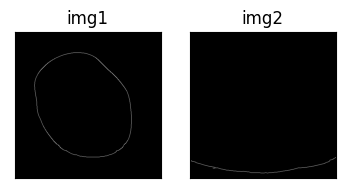

In [161]:

import cv2
import numpy as np
 
img1 = cv2.imread('/home/ubuntu/data_process/CT_Result/C/C_10.png', 0)
img2 = cv2.imread('/home/ubuntu/data_process/CT_Result/C/C_436.png', 0)
# img3 = cv2.imread('/home/ubuntu/data_process/CT_Result/C/C_315.png', 0)
ret, thresh1 = cv2.threshold(img1, 127, 255, 0)
ret, thresh2 = cv2.threshold(img2, 127, 255, 0)
ret, thresh3 = cv2.threshold(img3, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh1, 2, 1)
cnt1 = contours[0]
contours, hierarchy = cv2.findContours(thresh2, 2, 1)
cnt2 = contours[0]
contours, hierarchy = cv2.findContours(thresh3, 2, 1)
cnt3 = contours[0]
# 越相近，数越小，轮廓大小最好相当
ret1 = cv2.matchShapes(cnt1, cnt2, 1, 0.0)
print(ret1)
plt.subplot(131),plt.imshow(img1,cmap = 'gray')
plt.title('img1'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img2,cmap = 'gray')
plt.title('img2'), plt.xticks([]), plt.yticks([])

In [162]:
import cv2
import numpy as np
import os
img1 = cv2.imread('/home/ubuntu/data_process/CT_Result/C/C_11.png', 0)
ret, thresh1 = cv2.threshold(img1, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh1, 2, 1)
cnt1 = contours[0]
src_dir='/home/ubuntu/data_process/CT_Result/C'
files = os.listdir(src_dir)
i=0
for s in files:
    img2 = cv2.imread(src_dir + '/' + s, 0)
    ret, thresh2 = cv2.threshold(img2, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh2, 2, 1)
    cnt2 = contours[0]
    ret = cv2.matchShapes(cnt1, cnt2, 1, 0.0)
    # img = cv2.imread('/home/ubuntu/data_process/contour/C_Otus.10.png')
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 越相近，数越小，轮廓大小最好相当
    if ret<0.2:
       print("ret"+str(i),ret)
       img_path = "/home/ubuntu/data_process/dataset/C/" + "C_"+str(i) +".png"
       cv2.imwrite(img_path, img2)
       
    i+=1
    

ret1 0.07196286611666089
ret5 0.0288939160576156
ret6 0.002436547263509947
ret8 0.10766924965610666
ret9 0.03482376730213013
ret11 0.1377666079906408
ret14 0.11658377068685538
ret16 0.059376913157109856
ret18 0.01634164543517308
ret19 0.10557319741990634
ret20 0.08590069788912347
ret21 0.11473620785371097
ret25 0.1360423910990085
ret26 0.1267612938074506
ret27 0.1256482496483028
ret28 0.08076829328318585
ret29 0.07094341909457785
ret31 0.05455148895131845
ret33 0.07408364884215504
ret34 0.049614213674513075
ret35 0.02319996563267651
ret36 0.03610513204317439
ret37 0.1022101609298941
ret38 0.060576320272665796
ret40 0.03590193650031237
ret42 0.058308982698014544
ret44 0.11759772754365713
ret45 0.03553926049434747
ret46 0.02213769529601811
ret47 0.09937727089547316
ret49 0.08738652855120804
ret50 0.1595527924437644
ret53 0.0774537240422577
ret56 0.10508338669274753
ret57 0.012017099470026021
ret58 0.007832232495762259
ret59 0.06463138514353034
ret61 0.03957704492439906
ret62 0.1076123665

In [1]:
files = os.listdir('/home/ubuntu/data_process/dataset/C')   # 读入文件夹
num_png = len(files)       # 统计文件夹中的文件个数
print(num_png) 

NameError: name 'os' is not defined

In [7]:
import cv2
import numpy as np

# 加载图片
img1 = cv2.imread('/home/ubuntu/DeepLearning/Data/Alexnet_DataSet/C/C_6.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/home/ubuntu/DeepLearning/Data/Alexnet_DataSet/C/C_629.png', cv2.IMREAD_GRAYSCALE)

# 提取特征点
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# 匹配特征点
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# 计算特征点距离平均值
distances = [match.distance for match in matches]
avg_distance = sum(distances) / len(distances)

# 输出相似度
similarity = 1 / (1 + avg_distance)
print('相似度:', similarity)


相似度: 0.10416666666666667


In [ ]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 加载DICOM文件
dcm = pydicom.dcmread("sample.dcm")

# 提取DICOM图像数据
data = dcm.pixel_array

# 提取像素间距和层厚度
spacing = dcm.PixelSpacing + [dcm.SliceThickness]

# 将数据转换为3D坐标系
x, y, z = np.indices(data.shape)
coords = np.vstack((x.ravel(), y.ravel(), z.ravel())).T

# 创建3D网格和体素
voxels = data > -400
voxel_faces = []
for i in range(voxels.shape[0]):
    for j in range(voxels.shape[1]):
        for k in range(voxels.shape[2]):
            if voxels[i, j, k]:
                voxel_faces.append([(i, j, k), (i + 1, j, k), (i + 1, j + 1, k), (i, j + 1, k)])
                voxel_faces.append([(i, j, k), (i, j + 1, k), (i, j + 1, k + 1), (i, j, k + 1)])
                voxel_faces.append([(i, j, k), (i, j, k + 1), (i + 1, j, k + 1), (i + 1, j, k)])
                voxel_faces.append([(i, j, k + 1), (i, j + 1, k + 1), (i + 1, j + 1, k + 1), (i + 1, j, k + 1)])
                voxel_faces.append([(i + 1, j, k), (i + 1, j, k + 1), (i + 1, j + 1, k + 1), (i + 1, j + 1, k)])
                voxel_faces.append([(i, j + 1, k), (i, j + 1, k + 1), (i + 1, j + 1, k + 1), (i + 1, j + 1, k)])

# 绘制3D体素模型
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
collection = Poly3DCollection(voxel_faces, linewidths=0.05, alpha=0.1)
face_color = [0.5, 0.5, 1]
collection.set_facecolor(face_color)
ax.add_collection3d(collection)
ax.set_xlim([0, voxels.shape[0]])
ax.set_ylim([0, voxels.shape[1]])
ax.set_zlim([0, voxels.shape[2]])

# 投影3D模型到2D平面
ax.view_init(azim=90, elev=90)
plt.axis('off')
plt.savefig('projection.png', dpi=300, bbox_inches='tight', pad_inches=0)

# 显示2D投影结果
projection = plt.imread('projection.png')
plt.imshow(projection)
plt.show()


In [1]:
#将3D模型投影到2D平面中
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 定义DICOM文件路径和输出结果路径
dicom_folder = "/home/ubuntu/data/craniosynostosis/0t2/Cheng An Zhi78607961/201"
output_folder = "/home/ubuntu/data_process/3D_T_2D"

# 加载DICOM文件
dcm_files = [pydicom.dcmread(os.path.join(dicom_folder, f)) for f in os.listdir(dicom_folder) if f.endswith(".dcm")]

# 提取DICOM图像数据和像素间距
data = np.stack([dcm.pixel_array for dcm in dcm_files])
# spacing = np.array(dcm_files[0].PixelSpacing + [dcm_files[0].SliceThickness])
spacing = np.array(list(dcm_files[0].PixelSpacing) + [dcm_files[0].SliceThickness])

# 将数据转换为3D坐标系
x, y, z = np.indices(data.shape)
coords = np.vstack((x.ravel(), y.ravel(), z.ravel())).T

# 创建3D网格和体素
voxels = data > -400
voxel_faces = []
for i in range(voxels.shape[0]):
    for j in range(voxels.shape[1]):
        for k in range(voxels.shape[2]):
            if voxels[i, j, k]:
                voxel_faces.append([(i, j, k), (i + 1, j, k), (i + 1, j + 1, k), (i, j + 1, k)])
                voxel_faces.append([(i, j, k), (i, j + 1, k), (i, j + 1, k + 1), (i, j, k + 1)])
                voxel_faces.append([(i, j, k), (i, j, k + 1), (i + 1, j, k + 1), (i + 1, j, k)])
                voxel_faces.append([(i, j, k + 1), (i, j + 1, k + 1), (i + 1, j + 1, k + 1), (i + 1, j, k + 1)])
                voxel_faces.append([(i + 1, j, k), (i + 1, j, k + 1), (i + 1, j + 1, k + 1), (i + 1, j + 1, k)])
                voxel_faces.append([(i, j + 1, k), (i, j + 1, k + 1), (i + 1, j + 1, k + 1), (i + 1, j + 1, k)])

# 绘制3D体素模型
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
collection = Poly3DCollection(voxel_faces, linewidths=0.05, alpha=0.1)
face_color = [0.5, 0.5, 1]
collection.set_facecolor(face_color)
ax.add_collection3d(collection)
ax.set_xlim([0, voxels.shape[0]])
ax.set_ylim([0, voxels.shape[1]])
ax.set_zlim([0, voxels.shape[2]])

# 投影3D模型到2D平面
ax.view_init(azim=90, elev=90)
plt.axis('off')
plt.savefig('projection.png', dpi=300, bbox_inches='tight', pad_inches=0)

# 显示2D投影结果
projection = plt.imread('projection.png')
plt.imshow(projection)
plt.show()



: 

: 